<a href="https://colab.research.google.com/github/fsilvao/ia/blob/main/Machine_Learning_Exploratorio_datos_Fredy_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

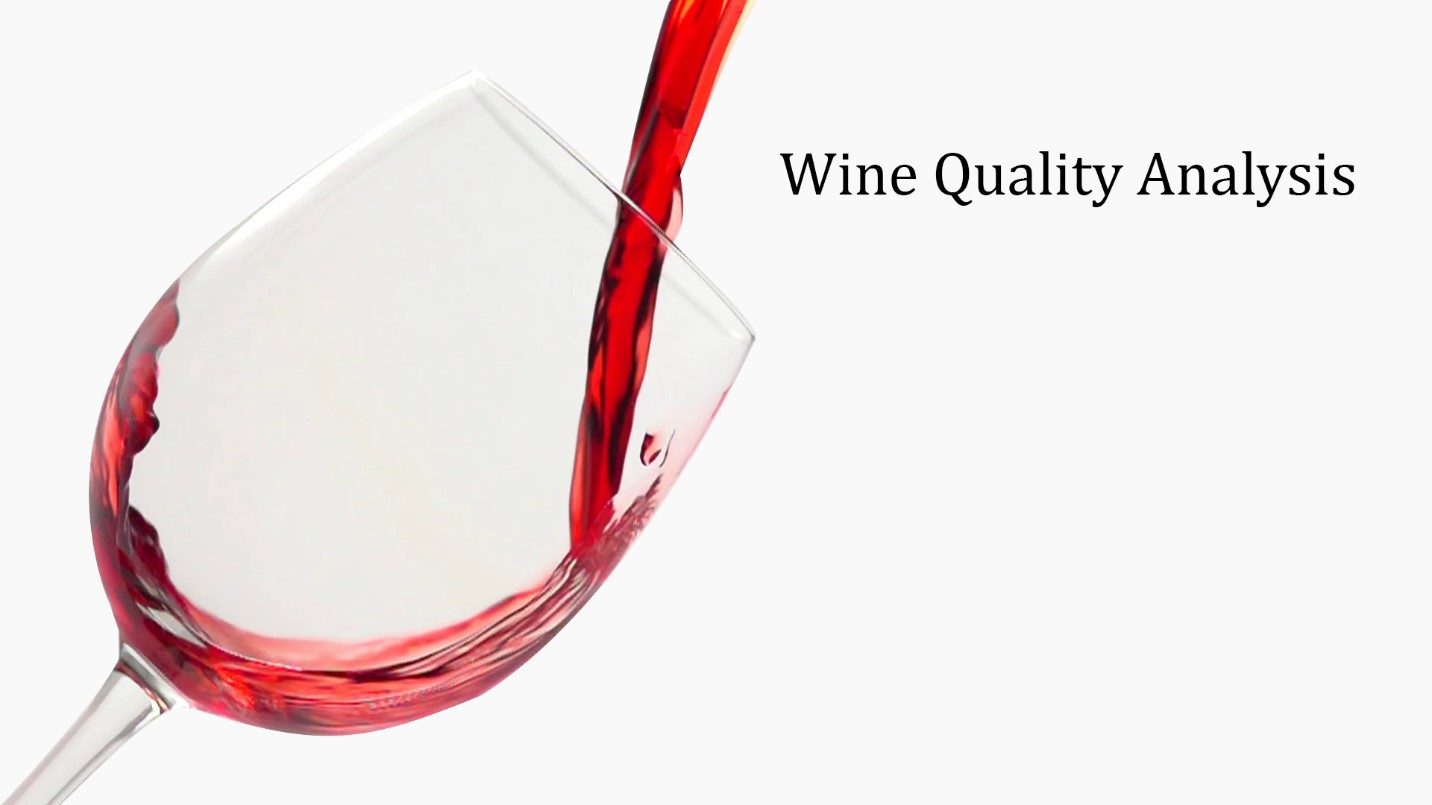

Tarea 1: Aprendizaje Automático

Utilizaremos un dataset de vinos extraido desde el UCI Machine Learning Repository, el cual es una colección de bases de datos, teorías de dominio y
generadores de datos que utiliza la comunidad de machine learning para el análisis empírico de los algoritmos.

El dataset son el resultado de un análisis químico de vinos cultivados en la misma región de Italia pero derivados de tres cultivares diferentes.
El análisis determinó las cantidades de 13 constituyentes que se encuentran en cada uno de los tres tipos de vinos. Este dataset puede ser encontrado aquí:
https://archive.ics.uci.edu/dataset/186/wine+quality


Los dos conjuntos de datos están relacionados con variantes rojas y blancas del vino portugués "Vinho Verde".

1.- Importar las librerias necesarias para realizar análisis exploratorio (las utilizadas en el ejercicio en clase)

2.- Desplegar las primeras 5 filas del dataset de vinos rojos

3.- Desplegar las primeras 5 filas del dataset de vinos blancos

4.- Concatene (junte) ambos datasets, el de vinos rojos y el de vinos blancos (puede usar la función concat() de pandas)

5.- Despliegue la cantidad de valores faltantes/nulos por cada característica

6.- Despliegue el tipo de dato de cada característica/columna

7.- Despliegue un resumen de los estadísticos del dataset (puede usar la función describe sobre el dataframe)

El siguiente trozo de código permite desplegar gráficos de cajas de cada atributo (excepto wine type):


In [ ]:
# No graficaremos la variable categorica type_wine, ya que solo puede tomar dos valores
# create box plots
#fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
#index = 0
#ax = ax.flatten()

#for col, value in df_wines.iloc[0:,0:-1].items():
#    if col != 'type':
#        sns.boxplot(y=col, data=df_wines.iloc[0:,0:-1], ax=ax[index])
#        index += 1
#plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

8.- ¿En cuál/cuáles atributos se observan outliers?

9.- Elimine los outliers usando el método IQR utilizado en el ejercicio de la primera clase.

10.- Ejecute nuevamente el código de visualización de gráficos de caja.

11.- ¿Puede observar outliers luego de la aplicacíón del método IQR?

12.- Despliegue gráficos Scatter entre el atributo "residual sugar" y cada uno de los siguientes: "volatile acidity", "chlorides", "sulphates", "density" y "alcohol".

13.- ¿Observa una correlación positiva entre "residual sugar" y alguno de los otros atributos? ¿cuáles? De haber más de uno, ¿cuál es el atributo que - visualmente- presenta una mayor correlación con "residual sugar"?

## ***RESPUESTAS***

**1.- Importar las librerias necesarias para realizar análisis exploratorio (las utilizadas en el ejercicio en clase)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**2.- Desplegar las primeras 5 filas del dataset de vinos rojos**

In [ ]:
dfWineWhite = pd.read_csv("/content/sample_data/winequality-white.csv", sep=';')
dfWineWhite = dfWineWhite.replace(';', ',', regex=True)
dfWineWhite.head()

#dfWineWhite_rows = len(dfWineWhite)
#dfWineWhite_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**3.- Desplegar las primeras 5 filas del dataset de vinos rojos**


In [ ]:
dfWineRed = pd.read_csv("/content/sample_data/winequality-red.csv", sep=';')
dfWineRed = dfWineRed.replace(';', ',', regex=True)
dfWineRed.head(5)

#dfWineRed_rows = len(dfWineRed)
#dfWineRed_rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**4.- Concatene (junte) ambos datasets, el de vinos rojos y el de vinos blancos (puede usar la función concat() de pandas)**

In [ ]:
allwines = pd.concat([dfWineRed, dfWineWhite], ignore_index=True)
allwines.head()

#allRows = len(allwines)
#allRows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**5.- Despliegue la cantidad de valores faltantes/nulos por cada característica**


In [ ]:
missing_values_new = allwines.isnull().sum()
missing_values_new

#No hay valores faltantes o nulos

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**6.- Despliegue el tipo de dato de cada característica/columna**

In [ ]:
data_types = allwines.dtypes
data_types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**7.- Despliegue un resumen de los estadísticos del dataset (puede usar la función describe sobre el dataframe)**


In [ ]:
summary_statistics = allwines.describe()
summary_statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


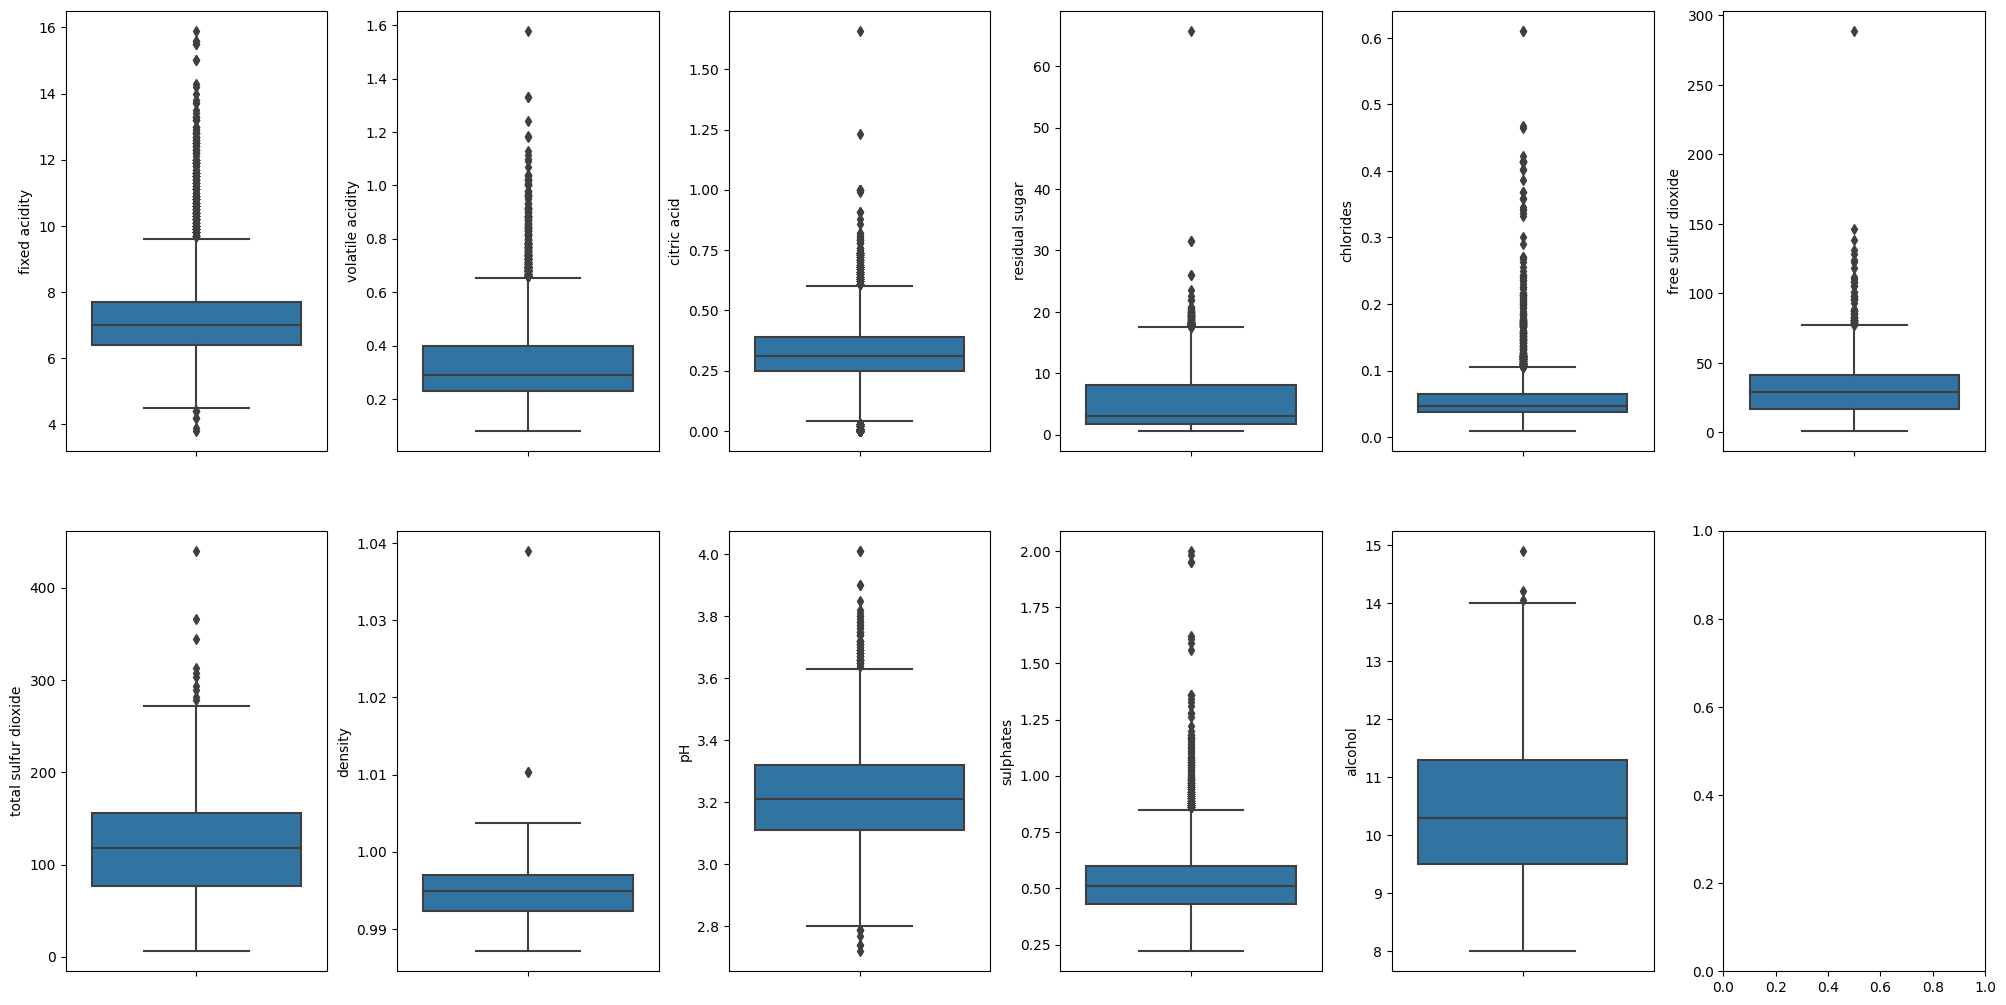

In [ ]:
# No graficaremos la variable categorica type_wine, ya que solo puede tomar dos valores
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in allwines.iloc[0:,0:-1].items():
    if col != 'type':
        sns.boxplot(y=col, data=allwines.iloc[0:,0:-1], ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**8.- ¿En cuál/cuáles atributos se observan outliers?**

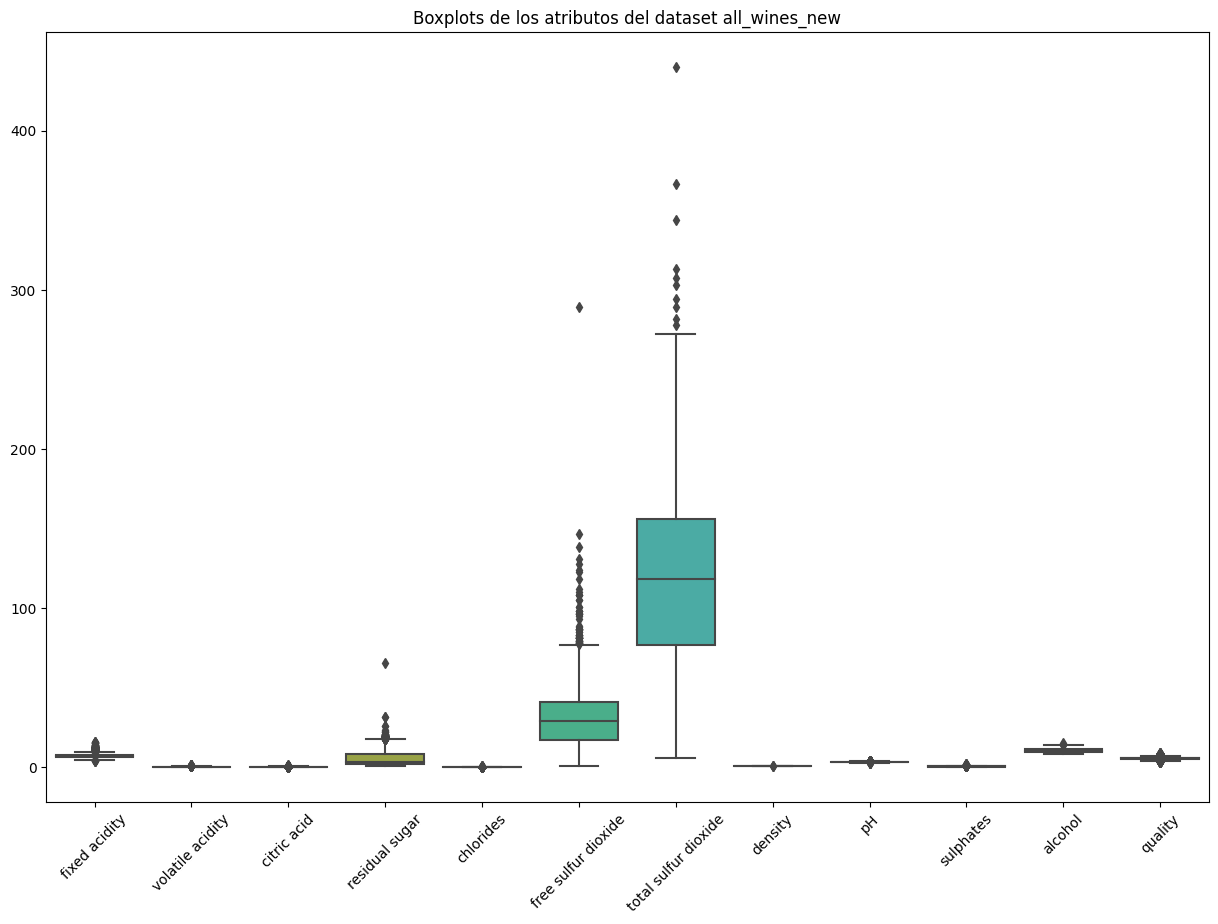

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=allwines)
plt.xticks(rotation=45)
plt.title("Boxplots de los atributos del dataset all_wines_new")
plt.show()

Los atributos que presentan outliers son:

1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

**9.- Elimine los outliers usando el método IQR utilizado en el ejercicio de la primera clase.**

In [ ]:
Q1 = allwines.quantile(0.25)
Q3 = allwines.quantile(0.75)
IQR = Q3 - Q1

allwines_nooutliers = allwines[~((allwines < (Q1 - 1.5 * IQR)) | (allwines > (Q3 + 1.5 * IQR))).any(axis=1)]
allwines_nooutliers = allwines_nooutliers.dropna()
allwines_nooutliers.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7


**10.- Ejecute nuevamente el código de visualización de gráficos de caja.**

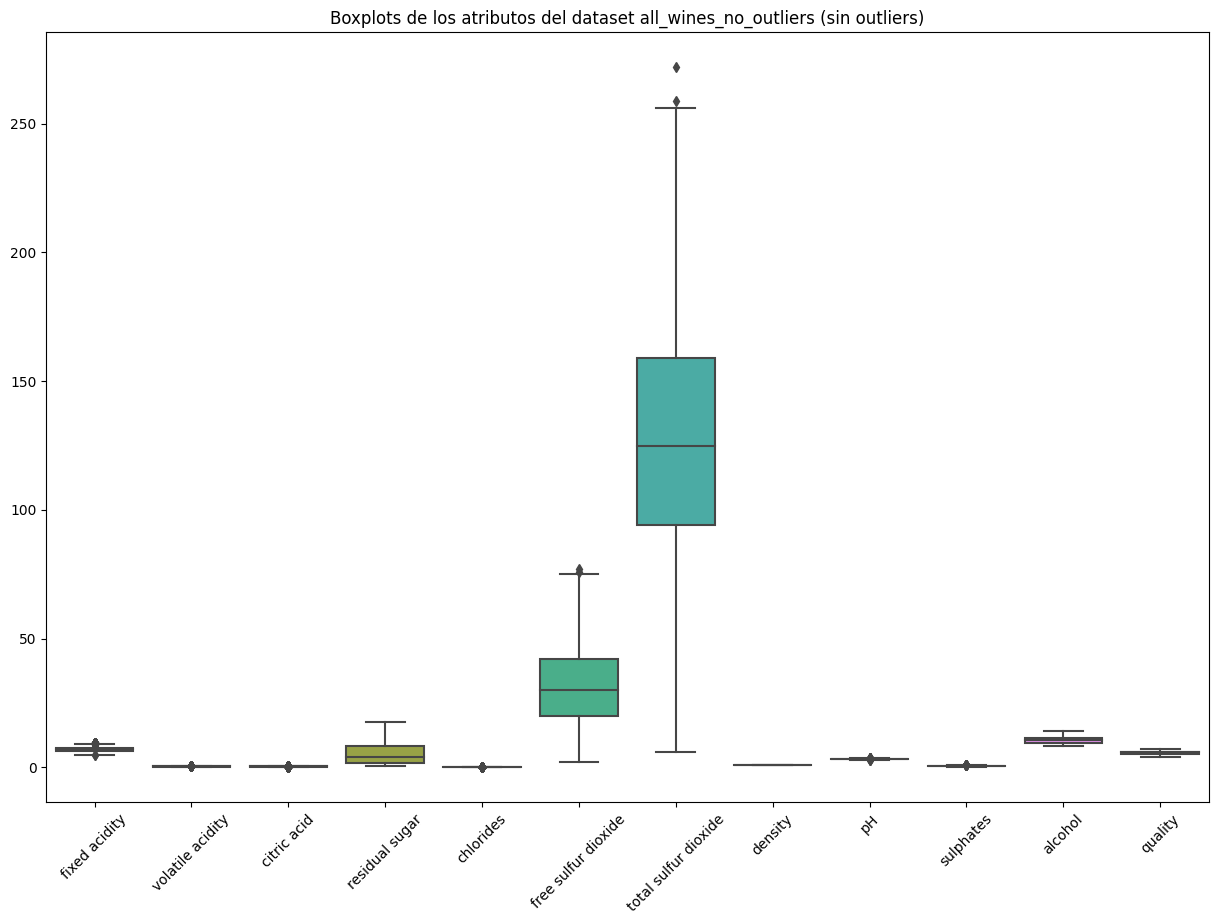

In [ ]:
plt.figure(figsize=(15,10))

sns.boxplot(data=allwines_nooutliers)
plt.xticks(rotation=45)
plt.title("Boxplots de los atributos del dataset all_wines_no_outliers (sin outliers)")
plt.show()


**11.- ¿Puede observar outliers luego de la aplicacíón del método IQR?**

El método IQR es como una regla que usamos para medir qué valores están "demasiado lejos" del tamaño promedio.
Esta regla tiene dos marcas: una marca más baja y una más alta. Los valores que están fuera de estas marcas se consideran "outliers".

Me quedé sólo con los valores que están dentro de un rango de tamaño que consideramos "normal".

Al graficar nuevamente se ve que ya no había valores "extraños", lo que significa que los "outliers" ya no están.

**12.- Despliegue gráficos Scatter entre el atributo "residual sugar" y cada uno de los siguientes: "volatile acidity", "chlorides", "sulphates", "density" y "alcohol".**

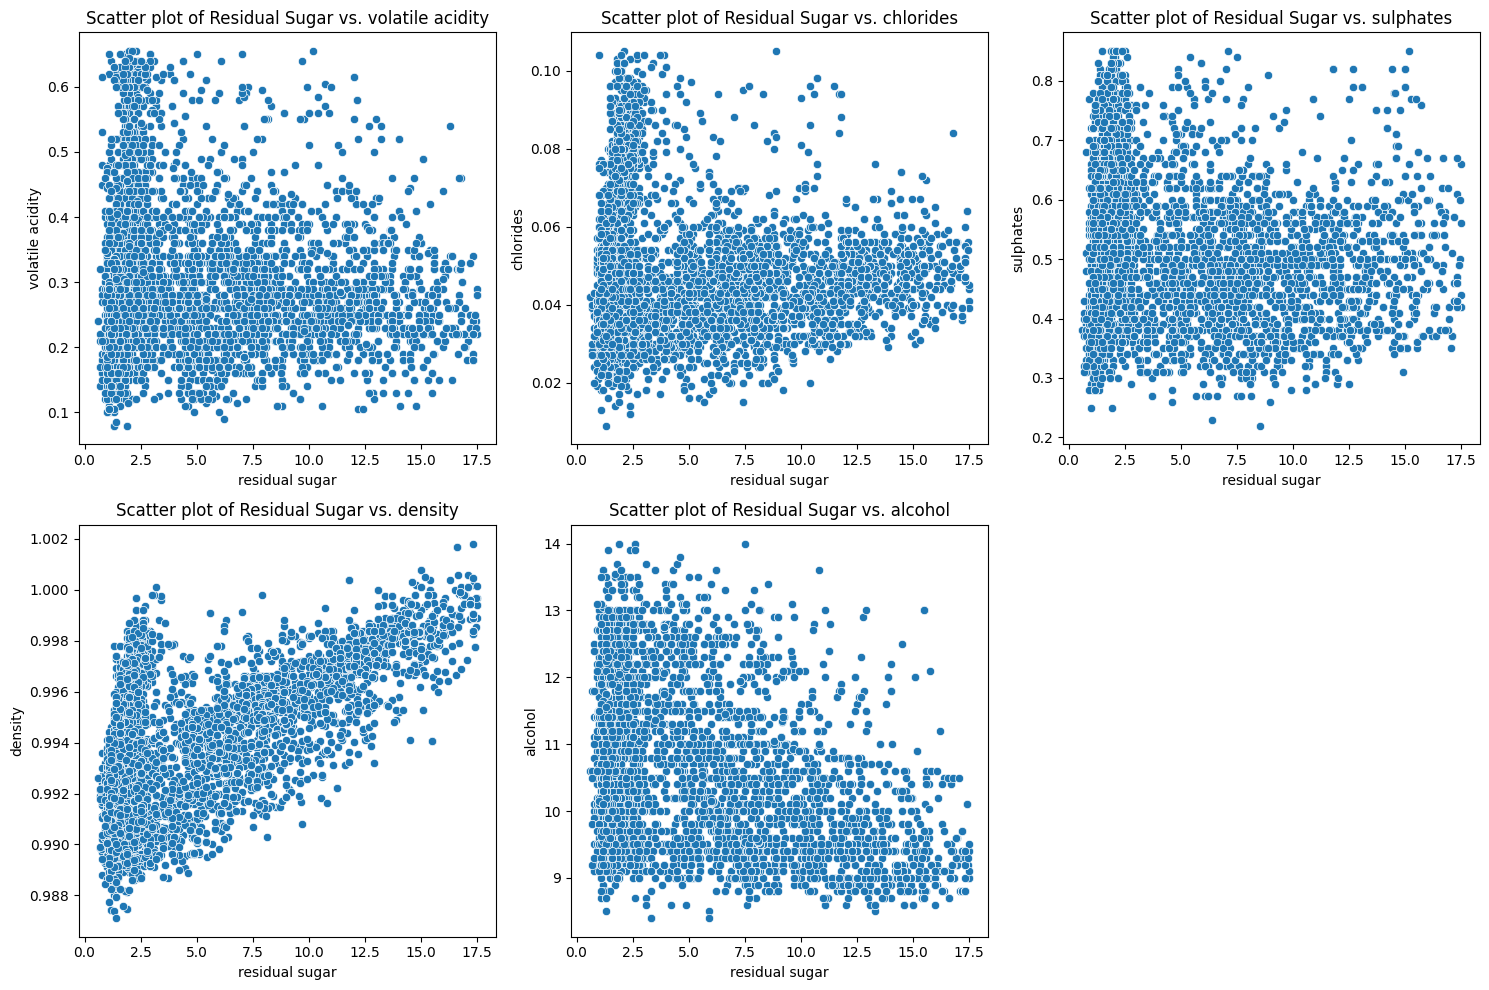

In [ ]:
atributos = ["volatile acidity", "chlorides", "sulphates", "density", "alcohol"]

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(atributos, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=allwines_nooutliers, x="residual sugar", y=attribute)
    plt.title(f"Scatter plot of Residual Sugar vs. {attribute}")

plt.tight_layout()
plt.show()


**13.- ¿Observa una correlación positiva entre "residual sugar" y alguno de los otros atributos? ¿cuáles? De haber más de uno, ¿cuál es el atributo que - visualmente- presenta una mayor correlación con "residual sugar"?**

En Residual Sugar vs. Density hay una correlación positiva. A medida que aumenta el "residual sugar", la "density" también aumenta. Los puntos siguen una tendencia ascendente, aunque no 100% lineal.